In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.datasets import fashion_mnist


# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Передобробка даних
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Створення моделі
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Компіляція моделі
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 213s 377ms/step - loss: 0.4444 - accuracy: 0.8466 - val_loss: 0.9088 - val_accuracy: 0.6771
Epoch 2/20
469/469 [==============================] - 173s 370ms/step - loss: 0.2956 - accuracy: 0.8952 - val_loss: 0.2725 - val_accuracy: 0.8979
Epoch 3/20
469/469 [==============================] - 166s 354ms/step - loss: 0.2429 - accuracy: 0.9127 - val_loss: 0.2468 - val_accuracy: 0.9103
Epoch 4/20
469/469 [==============================] - 164s 350ms/step - loss: 0.2112 - accuracy: 0.9245 - val_loss: 0.2253 - val_accuracy: 0.9170
Epoch 5/20
469/469 [==============================] - 168s 359ms/step - loss: 0.1884 - accuracy: 0.9312 - val_loss: 0.2429 - val_accuracy: 0.9164
Epoch 6/20
469/469 [==============================] - 168s 357ms/step - loss: 0.1716 - accuracy: 0.9384 - val_loss: 0.2265 - val_accuracy: 0.9192
Epoch 7/20
469/469 [==============================] - 167s 356ms/step - loss: 0.1535 - accuracy: 0.9448 - val_loss: 0.2186 -

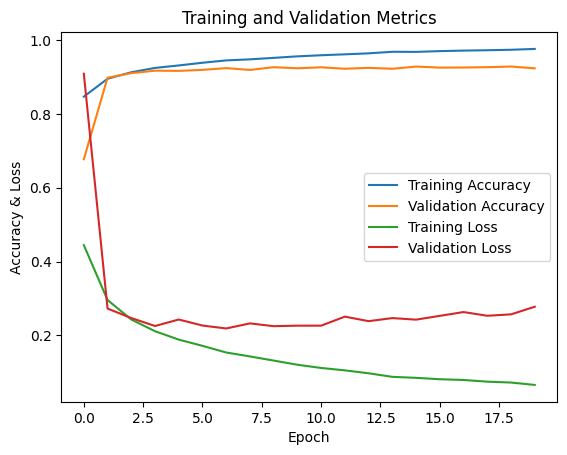

In [ ]:
# Побудова графіка
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy & Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

In [ ]:
# Оцінка точності
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9233999848365784
